# 제 3차 조별 데이터 분석 실습

* Mission
    * 지금까지 배운 기술을 활용하여 데이터 분석을 해본다.
    * 데이터 원본 분석을 한다.
    * 결측치, 이상치를 점검해 본다.
    * 전처리
    * 탐색적 연구 (Step1, Step2를 반복하여 데이터 분석의 깊이를 더한다.)
         * Step1] 데이터 분석을 위한 목적, 대상 또는 가설을 세워본다. 
         * Step2] 데이터 재 구조화, 시각화를 통해 새로운 insight 및 정보를 습득 및 가설을 검증한다.
    * 최종 결론을 내린다.

## 아래에 데이터를 import 하세요.

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [272]:
dairy_queen = pd.read_csv('../data/dairy-queen-menu-nutrition2.csv',encoding='cp949')

---

# Dairy Queen 한국 런칭 전략 수립을 위한 영양성분 분석

In [273]:
dairy_queen.head()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
0,Caramel Mocha Chip Shake - Small,600.0,100.0,27.0,21.0,1.0,45.0,240.0,79.0,1.0,65.0,12.0,M\S
1,Caramel Mocha Chip Shake - Medium,830.0,170.0,39.0,31.0,1.0,55.0,310.0,106.0,1.0,86.0,16.0,M\S
2,Caramel Mocha Chip Shake - Large,1100.0,230.0,52.0,41.0,1.5,75.0,410.0,140.0,2.0,113.0,20.0,M\S
3,Cinnamon Roll Centers Blizzard - Mini,360.0,300.0,13.0,8.0,0.5,45.0,150.0,53.0,0.0,43.0,8.0,E\M\W
4,Cinnamon Roll Centers Blizzard - Small,620.0,240.0,22.0,14.0,1.0,85.0,270.0,93.0,0.0,75.0,13.0,E\M\W


In [219]:
dairy_queen

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
0,Caramel Mocha Chip Shake - Small,600.0,100.0,27.0,21.0,1.0,45.0,240.0,79.0,1.0,65.0,12.0,M\S
1,Caramel Mocha Chip Shake - Medium,830.0,170.0,39.0,31.0,1.0,55.0,310.0,106.0,1.0,86.0,16.0,M\S
2,Caramel Mocha Chip Shake - Large,1100.0,230.0,52.0,41.0,1.5,75.0,410.0,140.0,2.0,113.0,20.0,M\S
3,Cinnamon Roll Centers Blizzard - Mini,360.0,300.0,13.0,8.0,0.5,45.0,150.0,53.0,0.0,43.0,8.0,E\M\W
4,Cinnamon Roll Centers Blizzard - Small,620.0,240.0,22.0,14.0,1.0,85.0,270.0,93.0,0.0,75.0,13.0,E\M\W
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Strawberry Banana Smoothie - XLarge,620.0,5.0,0.5,0.0,0.0,0.0,240.0,144.0,5.0,131.0,11.0,M
225,Tripleberry Smoothie - Large,460.0,0.0,0.0,0.0,0.0,0.0,180.0,107.0,2.0,104.0,8.0,M
226,Tripleberry Smoothie - Medium,370.0,0.0,0.0,0.0,0.0,0.0,135.0,87.0,2.0,84.0,6.0,M
227,Tripleberry Smoothie - Small,280.0,0.0,0.0,0.0,0.0,0.0,90.0,66.0,1.0,65.0,4.0,M


---

## 데이터 원본 분석

### 아래 내용을 확인하세요
* 데이터 사이즈
* 데이터 타입
* 각 열의 의미 (열의 이름 및 데이터를 보고 팀원과 상의하여 분석)
* 기타 확인하고 싶은 사항

In [220]:
dairy_queen.shape

(229, 13)

In [221]:
dairy_queen.dtypes

Menu Item               object
Calories (kcal)        float64
Fat Calories (kcal)    float64
Total Fat (g)          float64
Saturated Fat (g)      float64
Trans Fat (g)          float64
Cholesterol (mg)       float64
Sodium (mg)            float64
Carbohydrates (g)      float64
Fiber (g)              float64
Sugars (g)             float64
Protein (g)            float64
Allergens               object
dtype: object

In [222]:
dairy_queen.size

2977

In [223]:
dairy_queen.columns

Index(['Menu Item', 'Calories (kcal)', 'Fat Calories (kcal)', 'Total Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Carbohydrates (g)', 'Fiber (g)', 'Sugars (g)', 'Protein (g)',
       'Allergens'],
      dtype='object')

In [224]:
dairy_queen.describe()

,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g)
count,229.000000,229.000000,229.000000,229.000000,227.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,567.292576,207.694323,23.093013,12.174672,0.650661,46.004367,469.759825,77.489083,1.366812,58.270742,13.479476
std,313.542447,151.594545,16.852665,8.975359,0.657050,36.692714,514.575544,45.169623,1.458772,42.420783,9.637712
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,100.000000,12.000000,5.000000,0.000000,25.000000,180.000000,40.000000,0.000000,14.000000,8.000000
50%,500.000000,180.000000,20.000000,11.000000,0.500000,45.000000,290.000000,73.000000,1.000000,58.000000,12.000000
75%,760.000000,290.000000,32.000000,18.000000,1.000000,65.000000,520.000000,106.000000,2.000000,87.000000,18.000000
max,1510.000000,650.000000,72.000000,41.000000,2.500000,180.000000,2710.000000,203.000000,9.000000,158.000000,49.000000


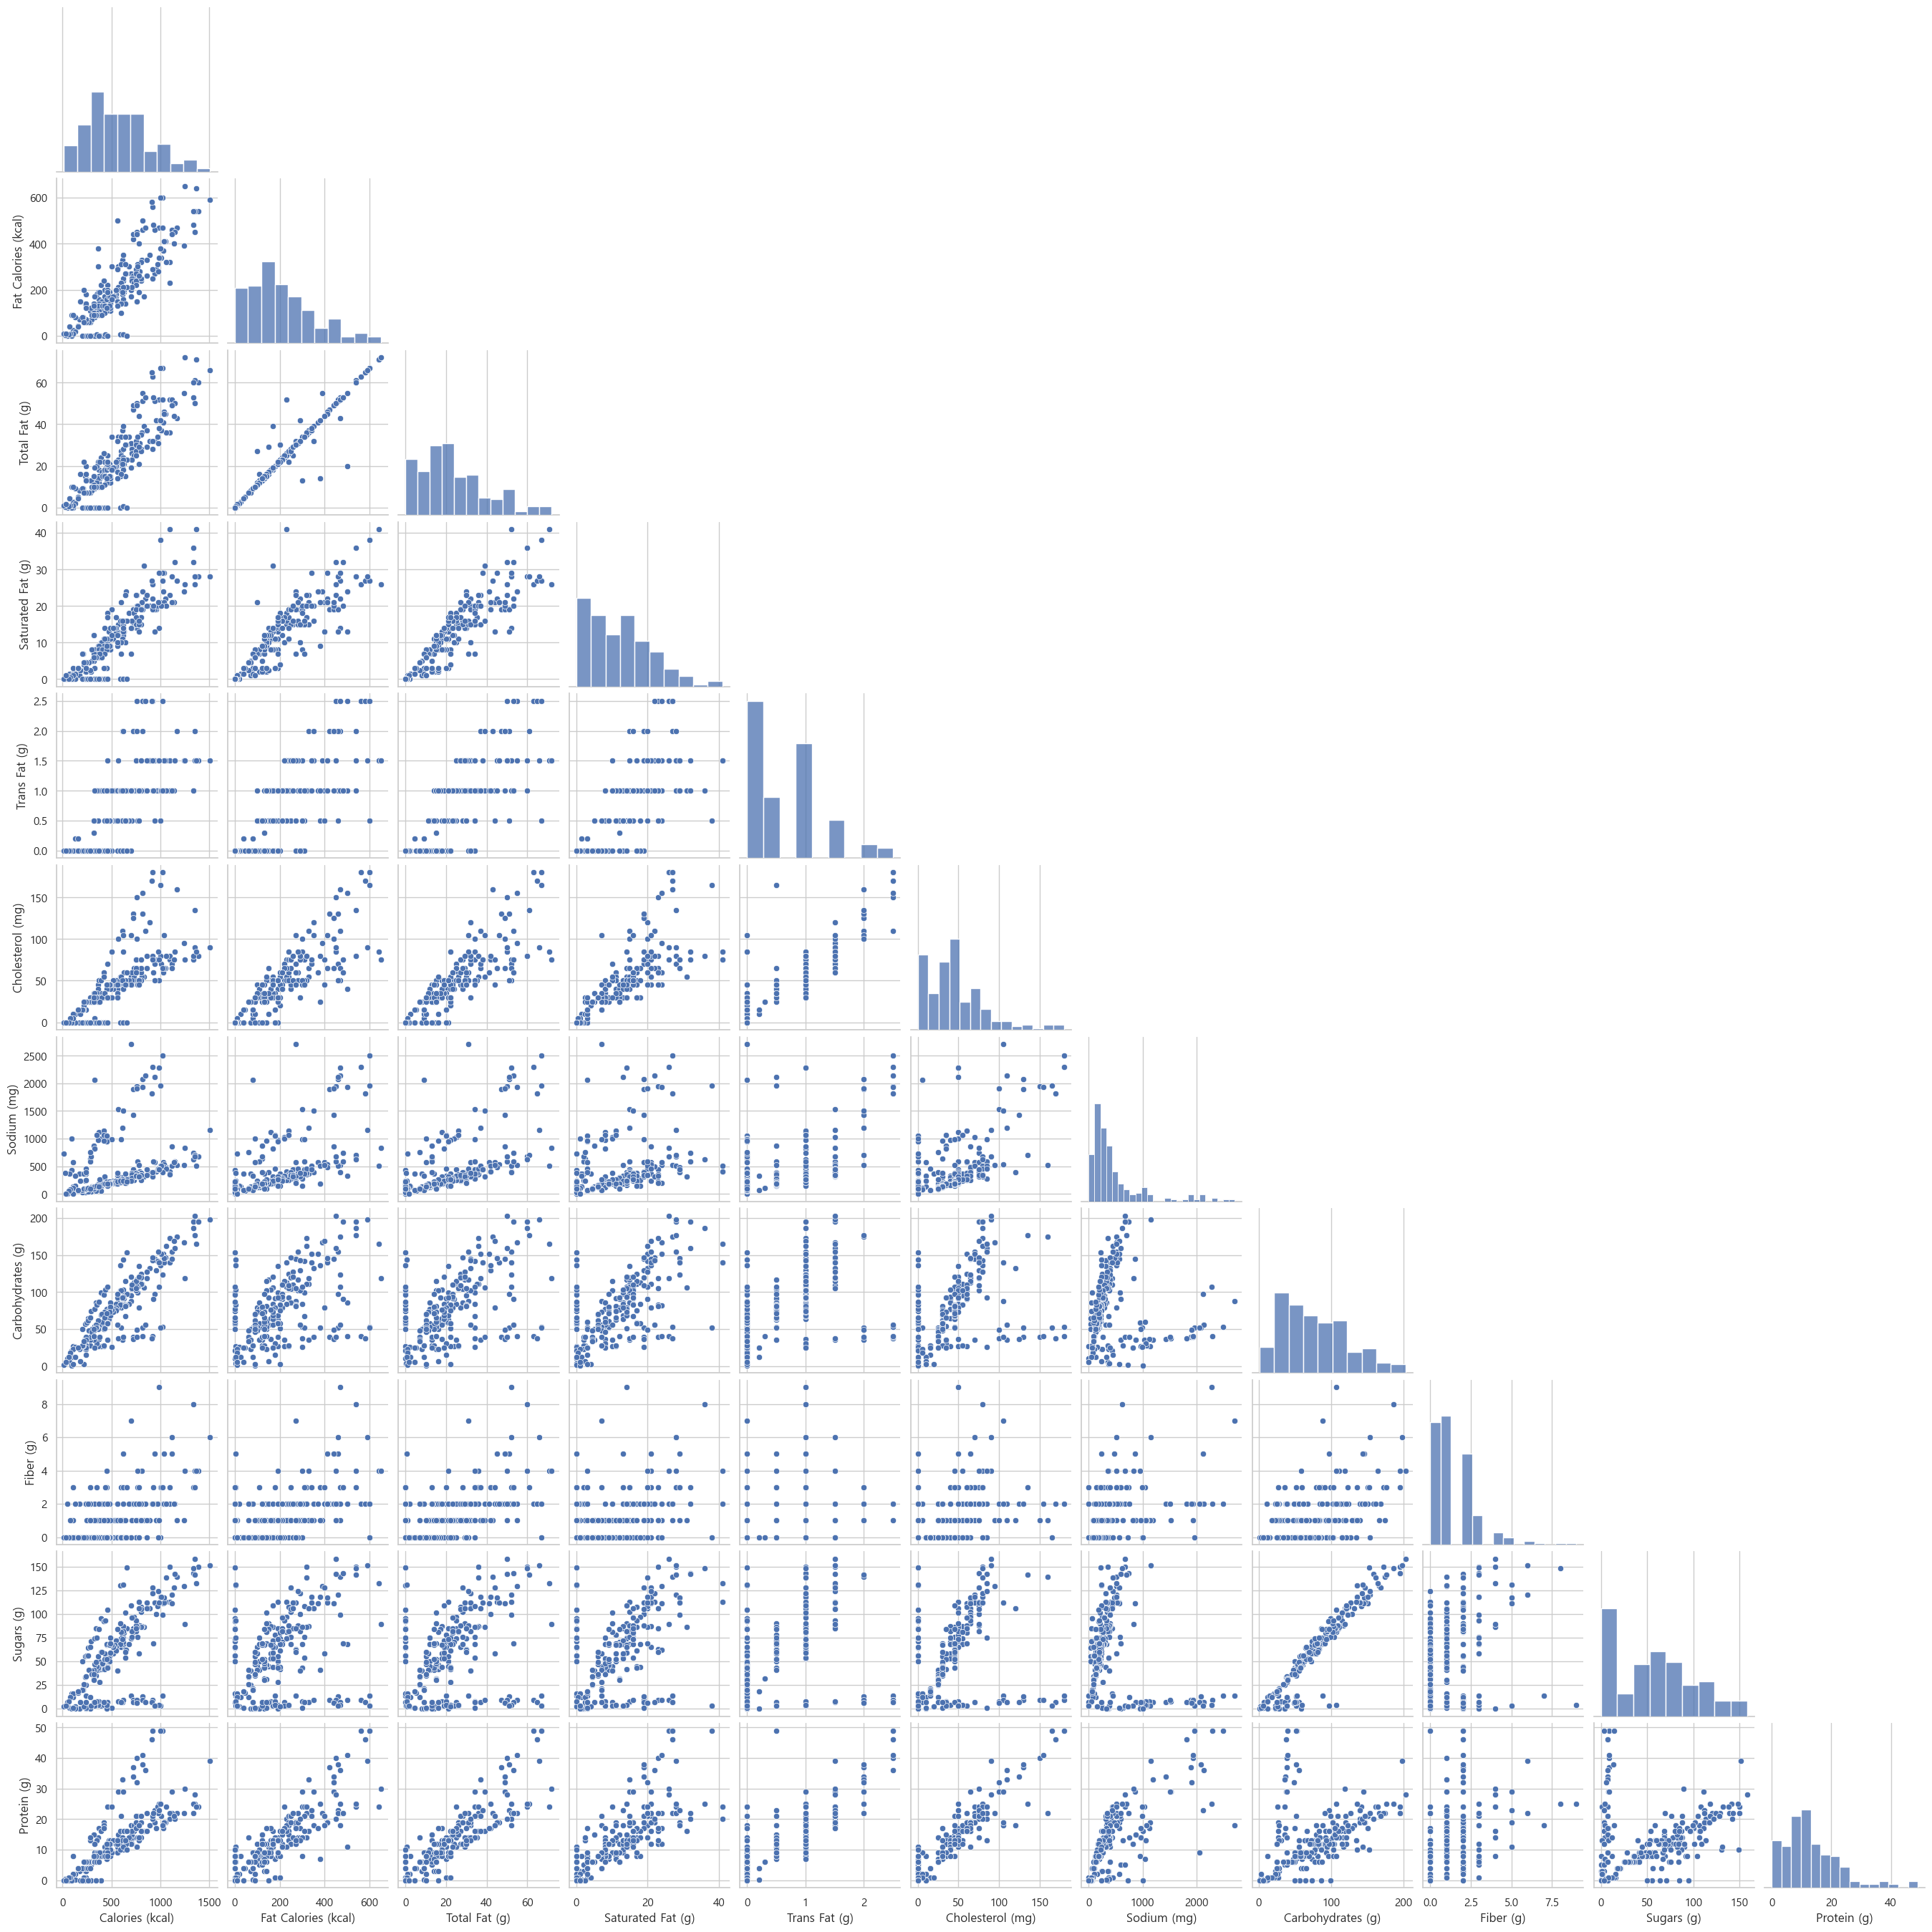

In [225]:
sns.pairplot(dairy_queen, corner=True)

### 원본 데이터 분석 후 학습한 사항

* 지방 칼로리, 총 지방, 포화 지방, 콜레스테롤, 당분이 0이거나 아주 적은 메뉴가 존재한다.
* 식이섬유와 트랜스 지방은 어떠한 성분과도 비례관계를 보이지 않는다.
* 총 지방과 지방 칼로리는 정비례 관계로 나타났으며 
  그 외 영양성분도 정비례관계에 가까웠다.
* 나트륨과 칼로리 관계에서 데이터에 두가지 경향이 있음을 확연히 알 수 있다. 

---

## 결측치, 이상치 점검
* 누락된 값이 있는지 확인
* 누락된 값을 다른 방식으로 표현하고 있는지도 확인. 예) -, NA, N/A 등
* 이상치 점검. 
예) 수치형 데이터중 특이한 min, max값, 수치형 데이터에서 정규분포를 이루는 데이터중 Outlier, 선형데이터상에 중간에 빈 데이터

In [226]:
dairy_queen.head()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
0,Caramel Mocha Chip Shake - Small,600.0,100.0,27.0,21.0,1.0,45.0,240.0,79.0,1.0,65.0,12.0,M\S
1,Caramel Mocha Chip Shake - Medium,830.0,170.0,39.0,31.0,1.0,55.0,310.0,106.0,1.0,86.0,16.0,M\S
2,Caramel Mocha Chip Shake - Large,1100.0,230.0,52.0,41.0,1.5,75.0,410.0,140.0,2.0,113.0,20.0,M\S
3,Cinnamon Roll Centers Blizzard - Mini,360.0,300.0,13.0,8.0,0.5,45.0,150.0,53.0,0.0,43.0,8.0,E\M\W
4,Cinnamon Roll Centers Blizzard - Small,620.0,240.0,22.0,14.0,1.0,85.0,270.0,93.0,0.0,75.0,13.0,E\M\W


In [227]:
dairy_queen.tail()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
224,Strawberry Banana Smoothie - XLarge,620.0,5.0,0.5,0.0,0.0,0.0,240.0,144.0,5.0,131.0,11.0,M
225,Tripleberry Smoothie - Large,460.0,0.0,0.0,0.0,0.0,0.0,180.0,107.0,2.0,104.0,8.0,M
226,Tripleberry Smoothie - Medium,370.0,0.0,0.0,0.0,0.0,0.0,135.0,87.0,2.0,84.0,6.0,M
227,Tripleberry Smoothie - Small,280.0,0.0,0.0,0.0,0.0,0.0,90.0,66.0,1.0,65.0,4.0,M
228,Tripleberry Smoothie - XLarge,660.0,0.0,0.0,0.0,0.0,0.0,220.0,153.0,3.0,149.0,10.0,M


In [228]:
dairy_queen.isnull().sum()

Menu Item               0
Calories (kcal)         0
Fat Calories (kcal)     0
Total Fat (g)           0
Saturated Fat (g)       0
Trans Fat (g)           2
Cholesterol (mg)        0
Sodium (mg)             0
Carbohydrates (g)       0
Fiber (g)               0
Sugars (g)              0
Protein (g)             0
Allergens              16
dtype: int64

In [229]:
dairy_queen.loc[(np.isnan(dairy_queen['Trans Fat (g)'])), :]

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
57,Country Gravy Dipping Sauce,70.0,40.0,4.5,1.5,NaN,0.0,360.0,6.0,0.0,1.0,0.0,M\S\W
62,Marzetti Dijon Honey Mustard,180.0,150.0,16.0,2.5,NaN,10.0,230.0,7.0,0.0,7.0,0.0,E


In [230]:
dairy_queen.loc[(pd.isnull(dairy_queen['Allergens'])), :]

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
38,Applesauce,45.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,7.0,0.0,NaN
39,Banana,110.0,5.0,0.0,0.0,0.0,0.0,0.0,27.0,3.0,14.0,1.0,NaN
41,"Fries, Kids'",170.0,70.0,8.0,1.0,0.0,0.0,370.0,23.0,2.0,0.0,3.0,NaN
48,"Fries, Large",450.0,190.0,21.0,3.0,0.0,0.0,950.0,59.0,4.0,0.0,8.0,NaN
49,"Fries, Regular",280.0,110.0,13.0,2.0,0.0,0.0,590.0,36.0,3.0,0.0,5.0,NaN
50,Lay’s® BBQ Potato Chips,230.0,140.0,15.0,2.0,0.0,0.0,230.0,23.0,2.0,3.0,3.0,NaN
51,Lay’s® Potato Chips - Original,240.0,140.0,16.0,2.0,0.0,0.0,250.0,23.0,2.0,1.0,3.0,NaN
56,BBQ Dipping Sauce Cup,90.0,0.0,0.0,0.0,0.0,0.0,430.0,21.0,1.0,16.0,1.0,NaN
63,Marzetti Light Italian Dressing,15.0,10.0,1.0,0.0,0.0,0.0,730.0,2.0,0.0,2.0,0.0,NaN
64,Wild Buffalo Dipping Sauce Cup,90.0,90.0,10.0,1.0,0.0,0.0,1000.0,1.0,0.0,0.0,0.0,NaN


---

## 결측치, 이상치 처리 방안 결정  
* Trans Fat 결측치의 경우 아래와 같이 dairy_queen 사이트에 영양정보가 있으며 트랜스 지방은 두 종류 다 0g이다.
* Allergens 결측치의 경우 알레르기를 유발하는 물질이 있지 않음을 표시하는 의미로 '없음'으로 처리하기로 한다.
* 그 외 특별한 이상치는 없는 것으로 추정된다.

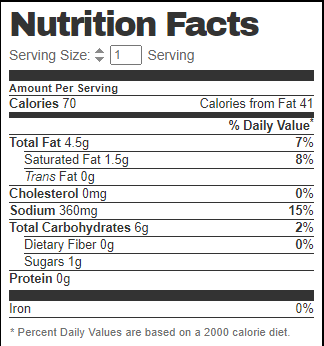 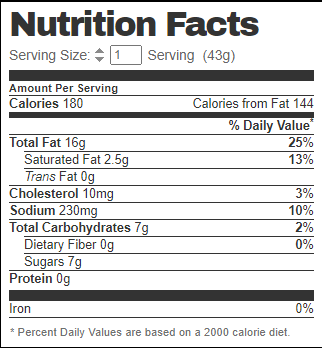 

출처: [nutritionix](https://www.nutritionix.com/i/dairy-queen/country-gravy-dipping-sauce/d3ea7274b31ffb66bf55511a)

In [231]:
dairy_queen['Trans Fat (g)']=dairy_queen['Trans Fat (g)'].fillna('0')

In [232]:
dairy_queen['Allergens']=dairy_queen['Allergens'].fillna('None')

In [233]:
dairy_queen.isnull().sum()

Menu Item              0
Calories (kcal)        0
Fat Calories (kcal)    0
Total Fat (g)          0
Saturated Fat (g)      0
Trans Fat (g)          0
Cholesterol (mg)       0
Sodium (mg)            0
Carbohydrates (g)      0
Fiber (g)              0
Sugars (g)             0
Protein (g)            0
Allergens              0
dtype: int64

---

## 전처리 작업 

In [234]:
dairy_queen.head()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
0,Caramel Mocha Chip Shake - Small,600.0,100.0,27.0,21.0,1.0,45.0,240.0,79.0,1.0,65.0,12.0,M\S
1,Caramel Mocha Chip Shake - Medium,830.0,170.0,39.0,31.0,1.0,55.0,310.0,106.0,1.0,86.0,16.0,M\S
2,Caramel Mocha Chip Shake - Large,1100.0,230.0,52.0,41.0,1.5,75.0,410.0,140.0,2.0,113.0,20.0,M\S
3,Cinnamon Roll Centers Blizzard - Mini,360.0,300.0,13.0,8.0,0.5,45.0,150.0,53.0,0.0,43.0,8.0,E\M\W
4,Cinnamon Roll Centers Blizzard - Small,620.0,240.0,22.0,14.0,1.0,85.0,270.0,93.0,0.0,75.0,13.0,E\M\W


* Menu Item 열을 카테고리별로 묶는 등의 방안을 고려해보았으나 시간이 오래 걸릴 것으로 판단하여 전처리 미작업
* Allergens 열을 분리기호를 기준으로 나누는 방안을 고려해보았으나 종류가 많고 None값이 많이 나오는 결과가 예상되어 전처리 미작업
* (g),(mg) 단위 통일 방안을 고려해보았으나 소수점이 많이 찍히고 (Kcal)단위가 따로 있어 전처리 미작업

---

## 1차 탐색적 분석
### Step1            
#### 데이터 분석의 목적, 대상 또는 가설을 세운다.
* 데이터 분석의 목적 : dairy_queen의 미국 현지 메뉴 영양 성분 분석을 통한 한국 현지화 전략 수립하고자 한다.
* 데이터 분석의 대상 : dairy_queen 메뉴의 영양성분 정보
* 가설 : 미국 현지 메뉴의 경우 지방 및 당분이 다량 함류된 고열량 메뉴가 주를 이루고 있을 것이다.

### Step2  
Step1에서 세운 가설을 지금까지 배운 모든 기술을 활용하여 검증해 보세요.
예) 통계자료, 데이터 재구조화, 시각화등

In [235]:
blizzard = dairy_queen[dairy_queen['Menu Item'].str.contains('Blizzard')]

In [236]:
blizzard = blizzard[~blizzard['Menu Item'].str.contains('Cake', case=False)]

In [237]:
blizzard.shape

(68, 13)

In [238]:
blizzard_large = blizzard[blizzard['Menu Item'].str.contains('Large')]
blizzard_large.head()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
6,Cinnamon Roll Centers Blizzard - Large,1170.0,470.0,43.0,27.0,2.0,160.0,520.0,175.0,1.0,139.0,22.0,E\M\W
10,Frosted Sugar Cookie Blizzard - Large,1240.0,390.0,55.0,24.0,1.5,95.0,520.0,167.0,1.0,129.0,22.0,E\M\S\W
16,Pumpkin Pie Blizzard - Large,940.0,270.0,32.0,19.0,1.5,70.0,570.0,145.0,2.0,112.0,19.0,E\M\S\W
76,Butterfinger® Blizzard - Large,970.0,310.0,34.0,20.0,1.0,75.0,440.0,142.0,2.0,108.0,24.0,M\P\S\(E)\(T)\(W)
80,Choco Brownie Extreme Blizzard - Large,1120.0,460.0,52.0,28.0,1.0,70.0,510.0,154.0,6.0,120.0,22.0,E\M\S\W


In [239]:
blizzard_large_mean = blizzard_large.describe().mean()
blizzard_large_mean

Calories (kcal)        919.619610
Fat Calories (kcal)    339.368942
Total Fat (g)           40.127602
Saturated Fat (g)       23.064595
Cholesterol (mg)        74.089629
Sodium (mg)            485.635688
Carbohydrates (g)      131.598657
Fiber (g)                5.019567
Sugars (g)             105.066777
Protein (g)             21.403791
dtype: float64

### 경쟁사 제품 영양정보 예시

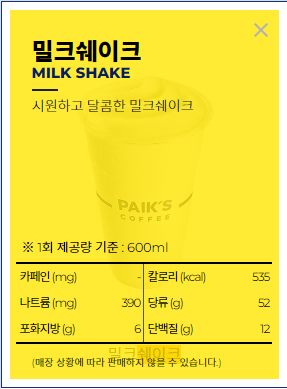

출처: [빽다방](https://paikdabang.com/menu/menu_drink/)

### 참고) 한국 일일 영양성분 기준치

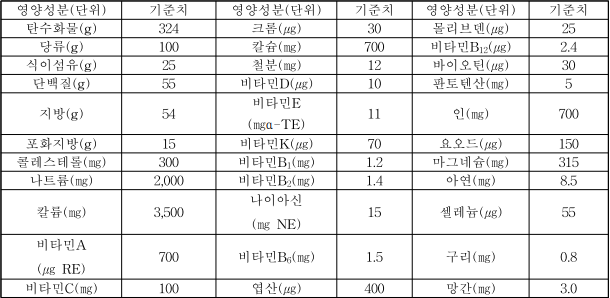

출처: [보건복지부](http://www.mohw.go.kr/react/jb/sjb030301vw.jsp?PAR_MENU_ID=03&MENU_ID=032901&CONT_SEQ=370012)

In [240]:
blizzard_small = blizzard[blizzard['Menu Item'].str.contains('Small')]
blizzard_small.head()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
4,Cinnamon Roll Centers Blizzard - Small,620.0,240.0,22.0,14.0,1.0,85.0,270.0,93.0,0.0,75.0,13.0,E\M\W
8,Frosted Sugar Cookie Blizzard - Small,700.0,200.0,30.0,14.0,1.0,55.0,290.0,95.0,0.0,74.0,13.0,E\M\S\W
14,Pumpkin Pie Blizzard - Small,560.0,500.0,20.0,13.0,1.0,40.0,330.0,86.0,2.0,68.0,11.0,E\M\S\W
74,Butterfinger® Blizzard - Small,520.0,160.0,18.0,11.0,0.5,40.0,230.0,76.0,1.0,58.0,13.0,M\P\S\(E)\(T)\(W)
78,Choco Brownie Extreme Blizzard - Small,620.0,250.0,28.0,15.0,0.5,40.0,280.0,86.0,3.0,68.0,12.0,E\M\S\W


In [241]:
blizzard_small_mean = blizzard_small.describe().mean()
blizzard_small_mean

Calories (kcal)        499.939175
Fat Calories (kcal)    218.588859
Total Fat (g)           22.216772
Saturated Fat (g)       13.478291
Cholesterol (mg)        43.307627
Sodium (mg)            261.836488
Carbohydrates (g)       72.740513
Fiber (g)                3.449623
Sugars (g)              57.864854
Protein (g)             12.970635
dtype: float64

In [242]:
burger = dairy_queen[dairy_queen['Menu Item'].str.contains('Burger')]
burger.head()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
17,Bacon Two Cheese Deluxe Burger - Double,720.0,420.0,47.0,19.0,2.0,130.0,1890.0,39.0,2.0,9.0,37.0,E\M\SS\S\W
18,Bacon Two Cheese Deluxe Burger - Triple,920.0,560.0,63.0,26.0,2.5,180.0,2300.0,40.0,2.0,9.0,49.0,E\M\SS\S\W
19,FlameThrower Burger - Double,720.0,440.0,49.0,19.0,2.0,125.0,1430.0,37.0,2.0,7.0,34.0,E\M\SS\S\W
20,FlameThrower Burger - Triple,910.0,580.0,65.0,27.0,2.5,170.0,1820.0,38.0,2.0,7.0,46.0,E\M\SS\S\W
24,Loaded A.1. Burger - Double,820.0,460.0,51.0,19.0,2.0,130.0,2080.0,52.0,2.0,13.0,38.0,E\M\SS\S\W


In [243]:
burger2 = dairy_queen[dairy_queen['Menu Item'].str.contains('burger')]
Sandwich = dairy_queen[dairy_queen['Menu Item'].str.contains('Sandwich')]
Dog = dairy_queen[dairy_queen['Menu Item'].str.contains('Dog')]

In [244]:
meals = pd.concat([burger,burger2,Sandwich,Dog])
meals.head()

,Menu Item,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g),Allergens
17,Bacon Two Cheese Deluxe Burger - Double,720.0,420.0,47.0,19.0,2.0,130.0,1890.0,39.0,2.0,9.0,37.0,E\M\SS\S\W
18,Bacon Two Cheese Deluxe Burger - Triple,920.0,560.0,63.0,26.0,2.5,180.0,2300.0,40.0,2.0,9.0,49.0,E\M\SS\S\W
19,FlameThrower Burger - Double,720.0,440.0,49.0,19.0,2.0,125.0,1430.0,37.0,2.0,7.0,34.0,E\M\SS\S\W
20,FlameThrower Burger - Triple,910.0,580.0,65.0,27.0,2.5,170.0,1820.0,38.0,2.0,7.0,46.0,E\M\SS\S\W
24,Loaded A.1. Burger - Double,820.0,460.0,51.0,19.0,2.0,130.0,2080.0,52.0,2.0,13.0,38.0,E\M\SS\S\W


In [245]:
meals_mean = meals.describe().mean()
meals_mean

Calories (kcal)         464.080655
Fat Calories (kcal)     254.501969
Total Fat (g)            31.523898
Saturated Fat (g)        14.641202
Cholesterol (mg)         74.472723
Sodium (mg)            1102.456655
Carbohydrates (g)        32.954412
Fiber (g)                 4.759669
Sugars (g)                9.731142
Protein (g)              24.413370
dtype: float64

In [246]:
temp = dairy_queen['Allergens'].str.split('\\')
sum = []

In [247]:
dairy_queen['Allergens'].str.split('\\')

0         [M, S]
1         [M, S]
2         [M, S]
3      [E, M, W]
4      [E, M, W]
         ...    
224          [M]
225          [M]
226          [M]
227          [M]
228          [M]
Name: Allergens, Length: 229, dtype: object

In [248]:
for i in range(len(temp)):
   sum += temp[i]

In [249]:
word_list =['E','F','M','P','SF','S','T','W','SS']
aller = []
for word in word_list:
    percent = (dairy_queen["Allergens"].str.contains(word).value_counts()[1] / dairy_queen.shape[0]) * 100
    aller.append(percent)

In [250]:
aller

[31.004366812227076,
 0.8733624454148471,
 85.58951965065502,
 17.03056768558952,
 0.43668122270742354,
 64.19213973799127,
 18.777292576419214,
 52.838427947598255,
 6.11353711790393]

In [251]:
x = ['달걀','생선','우유','땅콩','어패류','대두','견과류','밀','참깨']

In [252]:
df = pd.DataFrame({'알레르기 유발 식품' : x, '퍼센트' : aller})
df = df.sort_values(by=['퍼센트'], ascending=False)

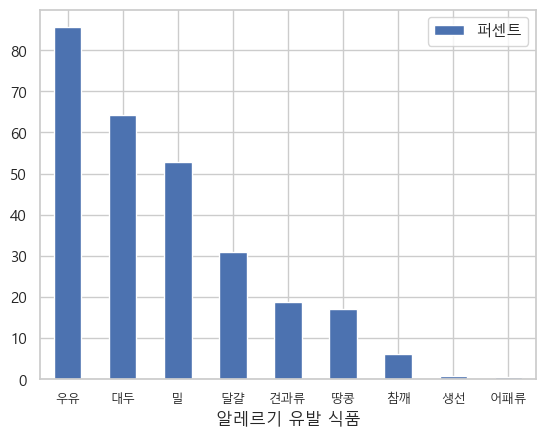

In [253]:
df.plot.bar(x='알레르기 유발 식품', y='퍼센트')
plt.xticks(rotation = 0, size = 9)
plt.show()

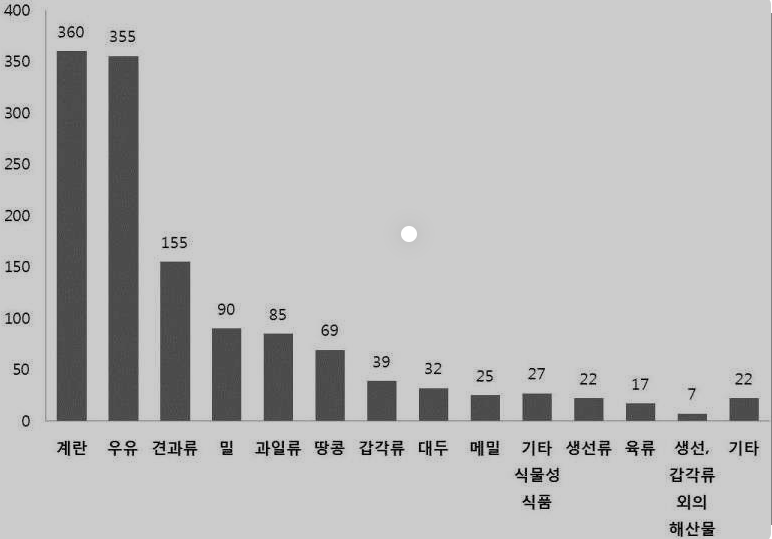

출처:[scienceon](https://scienceon.kisti.re.kr/srch/selectPORSrchReport.do?cn=TRKO201600016192)

---

## 1차 탐색적 분석
### Step1            
#### 데이터 분석의 목적, 대상 또는 가설을 세운다.
* 데이터 분석의 목적 : dairy_queen의 미국 현지 메뉴 영양 성분 분석을 통한 한국 현지화 전략 수립하고자 한다.
* 데이터 분석의 대상 : dairy_queen 메뉴의 영양성분 정보
* 가설 : 미국 현지 메뉴의 경우 지방 및 당분이 다량 함류된 고열량 메뉴가 주를 이루고 있을 것이다.

## 2차 탐색적 데이터 분석

* 1차 가설과 같이 dairy_queen의 미국 메뉴중 시그니쳐 메뉴인 blizzard 라지사이즈의 경우 동일한 한국 경쟁사 메뉴와 비교하여
  각 영양소가 2배가까이 함유되어있었다.
  이는 한국 일일 영양성분 기준치와 비교하여 당류는 1잔, 단백질은 2잔반, 포화지방은 0.8잔등으로 블리자드 라지사이즈
  1잔이면 기준치를 충족하는 것으로 보인다.
* 같은 메뉴의 스몰사이즈의 경우 기존 업체와 영양소 정보상으로는 비슷하거나 적은 면이 있었다.
* 식사류의 영양정보는 스몰사이즈와 비슷하다.
* 2차 분석중 Allergens 열과 관련하여 콩,참깨 알러지를 바탕으로 미국 현지 기준의 알러지 유발물질로 판단하였다.
  이에 전체 메뉴중 각 알러지 유발물질의 함유율을 분석해본 결과 우유가 85%로 대부분의 메뉴에 우유가 들어간 것으로 나타났다.
  한국인의 알러지 원인중 높은 순위에 우유가 있으므로 맞지 않을 수 있다고 보인다.

---

# 3차 탐색적 데이터 분석

* 시그니쳐 메뉴인 blizzard의 과잉 영양성분이 햄버거,샌드위치,핫도그 등의 식사류 메뉴에 비해서 얼마나 차이가 나는지 알아보려 한다.
* 2차 분석의 방향성 이외의 전략도 선택지로 제시해 보고자 한다.

In [254]:
main_meals = pd.DataFrame([blizzard_small_mean.values,blizzard_large_mean.values,meals_mean.values],
                          index = ['blizzard_small','blizzard_large','meals'],
                          columns = blizzard_small_mean.index)
main_meals

,Calories (kcal),Fat Calories (kcal),Total Fat (g),Saturated Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugars (g),Protein (g)
blizzard_small,499.939175,218.588859,22.216772,13.478291,43.307627,261.836488,72.740513,3.449623,57.864854,12.970635
blizzard_large,919.619610,339.368942,40.127602,23.064595,74.089629,485.635688,131.598657,5.019567,105.066777,21.403791
meals,464.080655,254.501969,31.523898,14.641202,74.472723,1102.456655,32.954412,4.759669,9.731142,24.413370


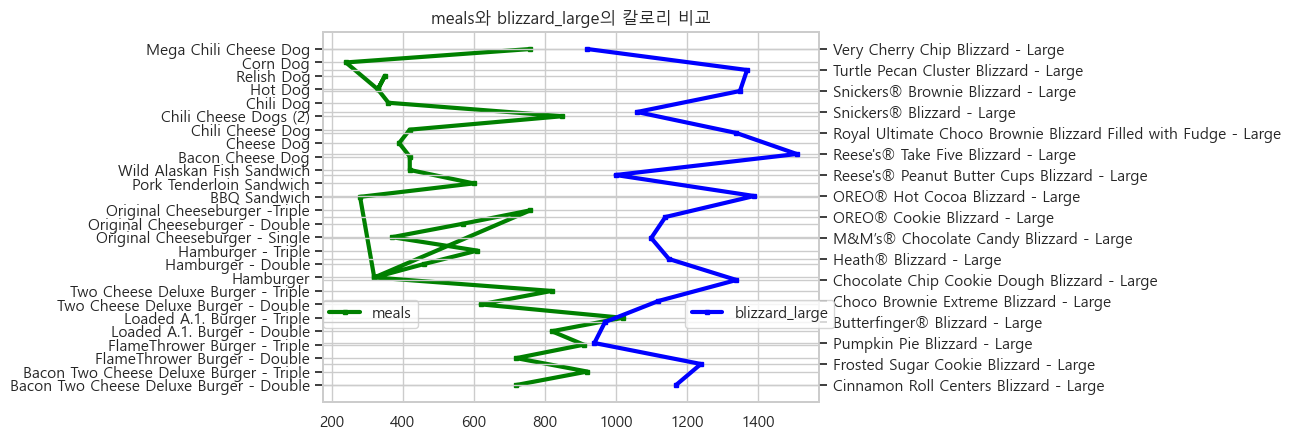

In [280]:
fig, ax1 = plt.subplots()
ax1.plot(meals['Calories (kcal)'], meals['Menu Item'], '-s', color='green', markersize=3, linewidth=3, label='meals')
ax3 = ax1.twinx()
ax3.plot(blizzard_large['Calories (kcal)'], blizzard_large['Menu Item'], '-s', color='blue', markersize=3, linewidth=3, label='blizzard_large')
plt.title('meals와 blizzard_large의 칼로리 비교')
ax1.legend(loc= (0,0.2))
ax3.legend(loc= (0.73,0.2))

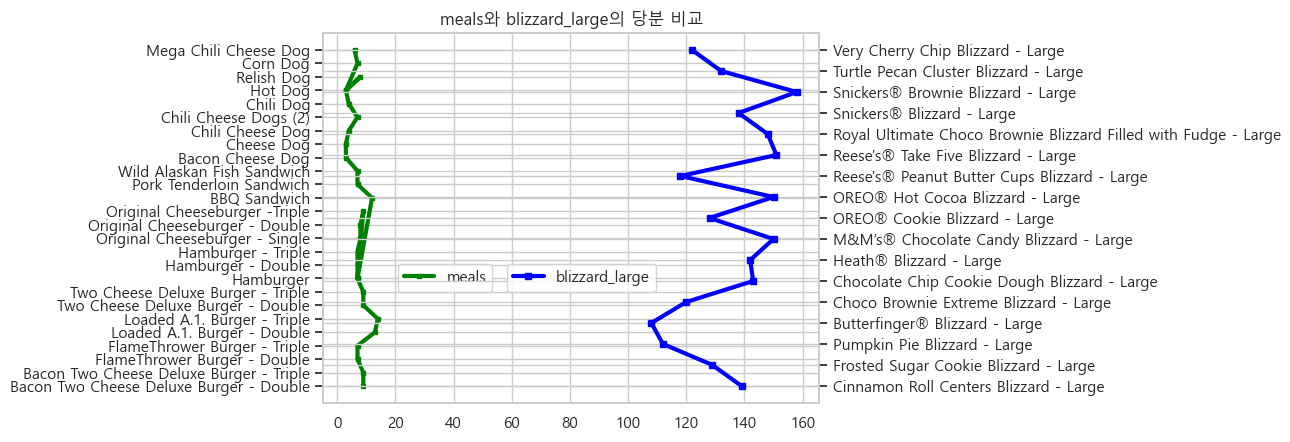

In [281]:
fig, ax1 = plt.subplots()
ax1.plot(meals['Sugars (g)'], meals['Menu Item'], '-s', color='green', markersize=3, linewidth=3, label='meals')
ax3 = ax1.twinx()
ax3.plot(blizzard_large['Sugars (g)'], blizzard_large['Menu Item'], '-s', color='blue', markersize=4, linewidth=3, label='blizzard_large')
plt.title('meals와 blizzard_large의 당분 비교')
ax1.legend(loc= (0.15,0.3))
ax3.legend(loc= (0.37,0.3))

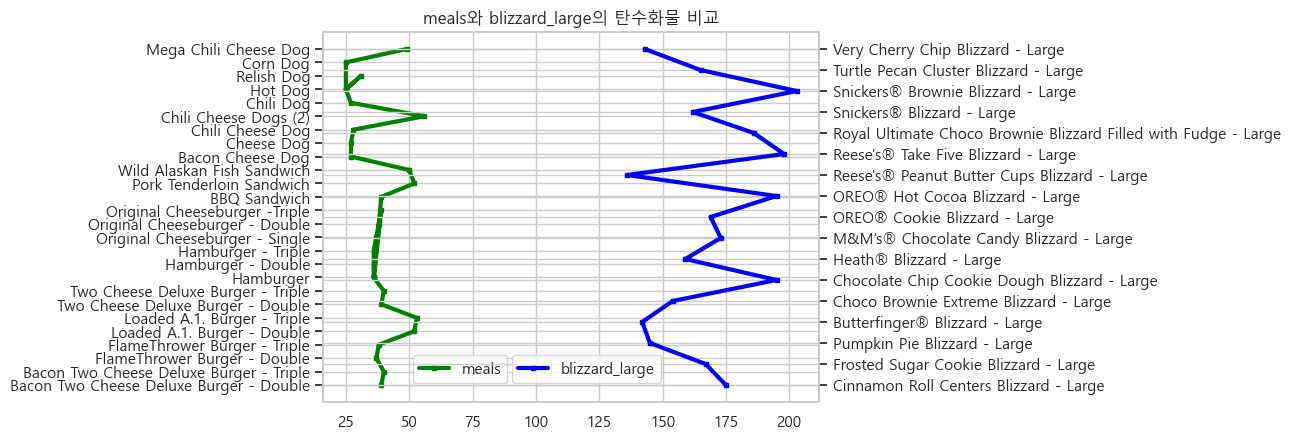

In [282]:
fig, ax1 = plt.subplots()
ax1.plot(meals['Carbohydrates (g)'], meals['Menu Item'], '-s', color='green', markersize=3, linewidth=3, label='meals')
ax3 = ax1.twinx()
ax3.plot(blizzard_large['Carbohydrates (g)'], blizzard_large['Menu Item'], '-s', color='blue', markersize=3, linewidth=3, label='blizzard_large')
plt.title('meals와 blizzard_large의 탄수화물 비교')
ax1.legend(loc= (0.18,0.05))
ax3.legend(loc= (0.38,0.05))

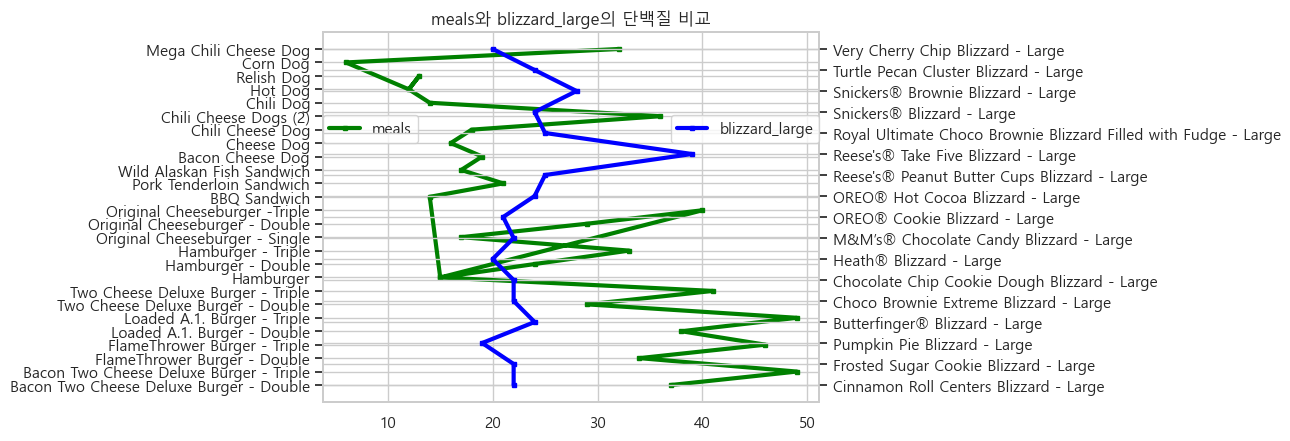

In [283]:
fig, ax1 = plt.subplots()
ax1.plot(meals['Protein (g)'], meals['Menu Item'], '-s', color='green', markersize=3, linewidth=3, label='meals')
ax3 = ax1.twinx()
ax3.plot(blizzard_large['Protein (g)'], blizzard_large['Menu Item'], '-s', color='blue', markersize=3, linewidth=3, label='blizzard_large')
plt.title('meals와 blizzard_large의 단백질 비교')
ax1.legend(loc= (0,0.7))
ax3.legend(loc= (0.7,0.7))

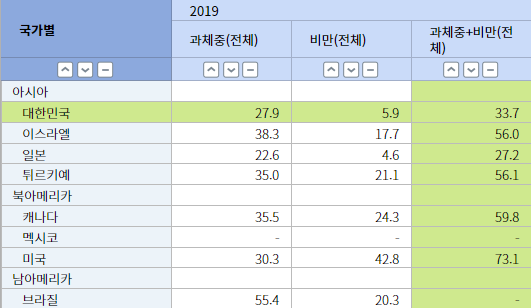

출처: [kosis](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAAC15)

## 최종결론

### 1. 현지화 순응 전략  (영양성분 감소 전략)
* dairy_queen의 한국 현지화 전략으로 한국인에게 맞는 메뉴 개발 및 소재 변경을 통하여 제품의 과다한 영양소를 낮추는  
  전략이 필요할 수 있습니다.  
* 라지사이즈 보다는 스몰사이즈 제품의 마켓팅에 주력하는 방안이 효과 있을 수 있습니다.
* 또한 알러지 유발식품을 회피하기 위한 면에서도 우유를 두유로 교체한 메뉴를 개발하는 등의 방법이 필요할 수 있습니다.

### 2. 현지화 역행 전략 (도핑 전략 혹은 패스트푸드 전략)
* dairy_queen의 blizzard 메뉴 시리즈는 영양성분적으로 높은 열량,당분, 탄수화물 등을 포함하고 있습니다.  
  건강에 해로울 수 있으나, 반면 일시적인 도핑효과를 기대할 수있는 면도 있습니다.  
* 영양성분적으로는 라지사이즈 한컵으로 한끼 식사 혹은 일일 권장섭취량을 충족하므로 식사시간을 줄이고자하는  
  패스트 푸드 고객층의 요구에 부합할 수 있습니다.
* 이 전략은 미국에서의 마켓팅 전략을 그대로 적용하라는 뜻은 아닙니다. 두 나라의 비만율 격차가 의미하는 것처럼  
  귀사가 한국에서 기대 할 수 있는 고객층이 적을 수 있습니다.
* 현지화 역행 전략에서도 영양성분 조정등을 통한 메뉴 개발이 필요할 수 있습니다.